# Importing required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [4]:
# Print all columns:
pd.set_option('display.max_columns',None)

In [5]:
# Showing 5 raws of dataframe:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# Get the numbers of rows and columns:
df.shape

(8425, 23)

In [7]:
# Check column of the dataframe:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
# Get the column datatypes:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
# Basic information about dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [10]:
# Summary statistics:
df.describe().style.background_gradient()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [11]:
# Get a count of the empty values for each column:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [12]:
# Check any missing/null values in the dataset:
df.isnull().values.any()

True

<AxesSubplot:>

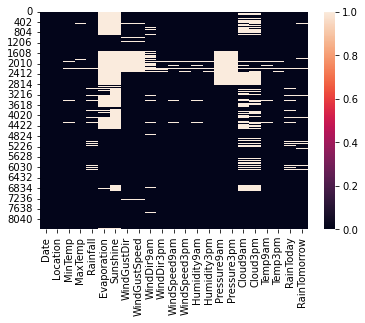

In [13]:
# Checking for null values using heatmap:
sns.heatmap(df.isnull())

In [14]:
# Hrer Categories data fill null values:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.columns[df.dtypes=='object']] = cat_imputer.fit_transform(df[df.columns[df.dtypes=='object']])

In [15]:
# Here Numerical data fill null values:
from sklearn.impute import KNNImputer
num_imputer = KNNImputer(n_neighbors=3)
df[df.columns[df.dtypes!='object']] = num_imputer.fit_transform(df[df.columns[df.dtypes!='object']])

In [16]:
# Get a count of the empty values for each column:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [17]:
# Print all of the data types and their unique values:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('____________________________________________')

Date : ['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
____________________________________________
Location : ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
____________________________________________
WindGustDir : ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
N      1704
SSE     578
S       577
SW      572
E       557
WNW     

In [18]:
# Here Convert Categories data:
# from date convert to day and month
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month

In [19]:
# Here drop date:
df.drop('Date', axis=1, inplace=True)

In [20]:
# Here label encoding of categorical data:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']])
df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']] = encoder.transform(df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']])

In [21]:
# Showing 5 raws of dataframe:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
0,1.0,13.4,22.9,0.6,15.733333,0.500000,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.666667,16.9,21.8,No,No,1,12
1,1.0,7.4,25.1,0.0,4.800000,10.066667,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.666667,1.333333,17.2,24.3,No,No,2,12
2,1.0,12.9,25.7,0.0,5.733333,11.666667,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,3.000000,2.000000,21.0,23.2,No,No,3,12
3,1.0,9.2,28.0,0.0,5.133333,10.866667,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.333333,0.666667,18.1,26.5,No,No,4,12
4,1.0,17.5,32.3,1.0,3.133333,8.833333,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12


In [22]:
df['RainToday'] = df['RainToday'].apply(lambda s : 1 if s=='yes' or s=='Yes' else 0)

In [23]:
df['RainToday'].value_counts()

0    6435
1    1990
Name: RainToday, dtype: int64

In [24]:
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda s : 1 if s=='Yes' or s=='Y' else 0)

In [25]:
df['RainTomorrow'].value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

# Data Analysis and Visualization

<AxesSubplot:ylabel='RainToday'>

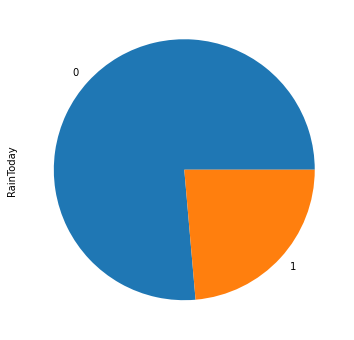

In [26]:
# display pieplot for RainToday in data:
plt.figure(figsize=(6,6))
df['RainToday'].value_counts().plot(kind='pie')

In this pie chart the count of no means no rain today is more then yes.

<AxesSubplot:ylabel='RainTomorrow'>

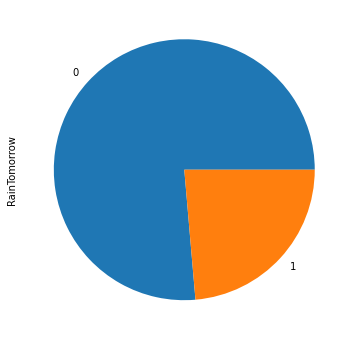

In [27]:
# display pieplot for RainTomorrow in data:
plt.figure(figsize=(6,6))
df['RainTomorrow'].value_counts().plot(kind='pie')

In this pie chart the count of no means no rain tomorrow is more then yes.

<AxesSubplot:xlabel='RainToday', ylabel='count'>

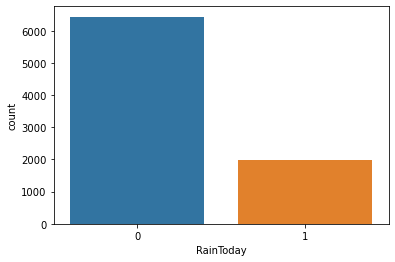

In [28]:
#Visualize the number of RainToday.
sns.countplot(df['RainToday'])

In this graph count of 0 is more then 1 for rain today.

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

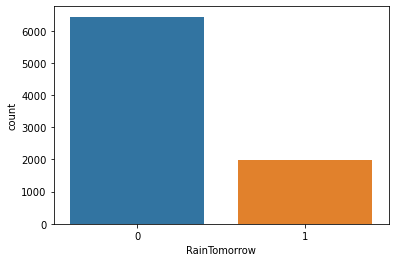

In [29]:
#Visualize the number of RainTomorrow.
sns.countplot(df['RainTomorrow'])

In this graph count of 0 is more then 1 for rain tomorrow.

<AxesSubplot:xlabel='Location', ylabel='count'>

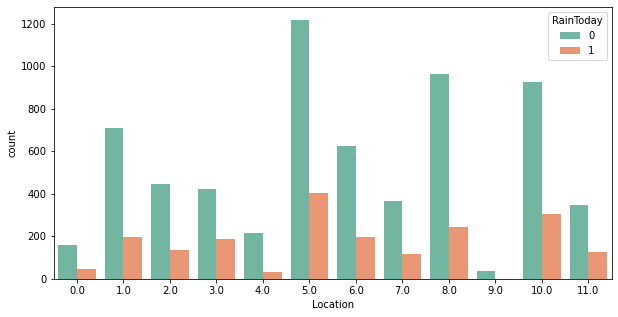

In [30]:
# Location and RainToday:
plt.figure(figsize=(10,5))
sns.countplot(x='Location',data=df, hue='RainToday', palette='Set2')

<AxesSubplot:xlabel='Location', ylabel='count'>

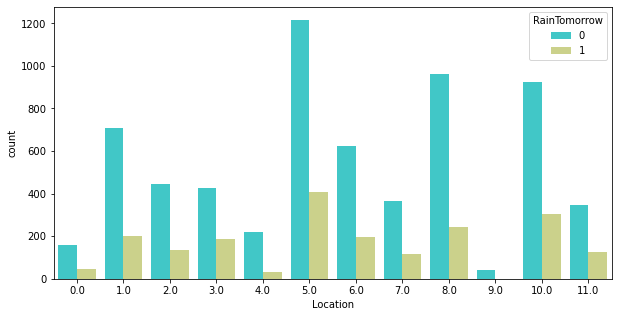

In [31]:
# Location and RainTomorrow:
plt.figure(figsize=(10,5))
sns.countplot(x='Location',data=df, hue='RainTomorrow', palette='rainbow')

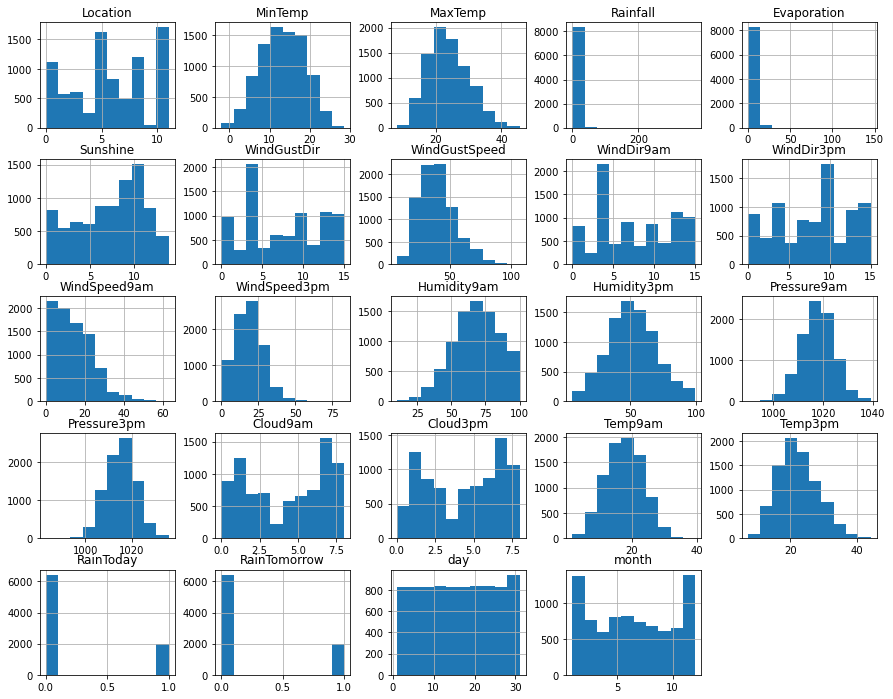

In [32]:
# display histogram:
df.hist(figsize=(15,12), layout=(5,5), sharex=False);

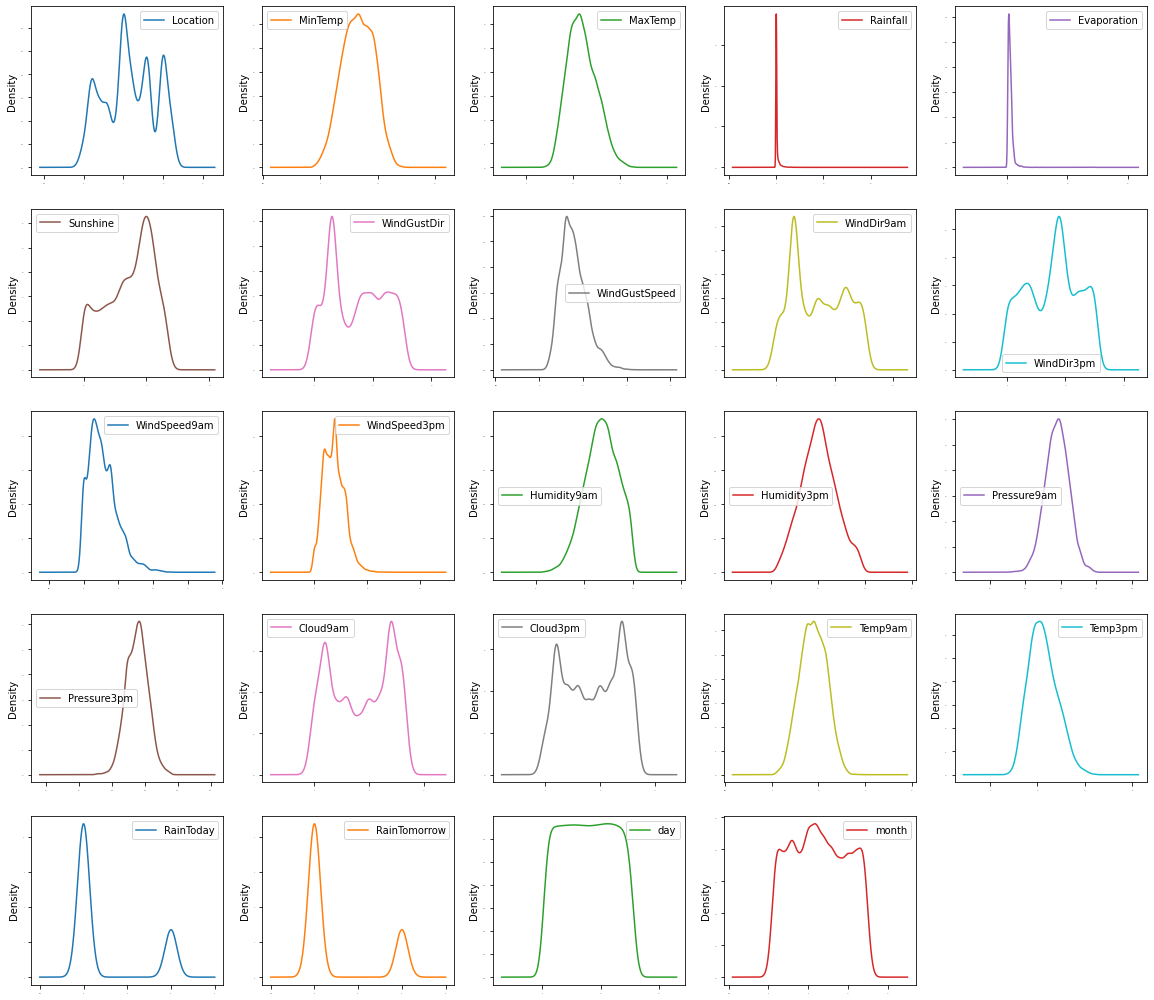

In [33]:
# Let's check the data distribution among all the columns.
df.plot(kind='density', subplots=True, layout=(5,5), sharex=False, legend=True, fontsize=1, figsize=(20,18))
plt.show()

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

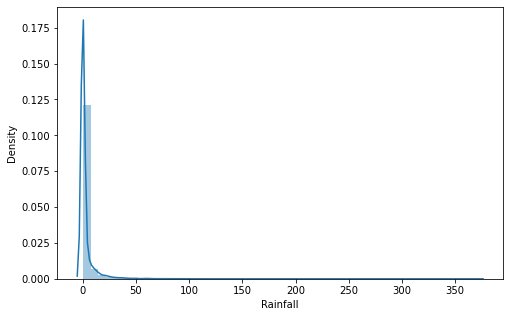

In [34]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Rainfall'])

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

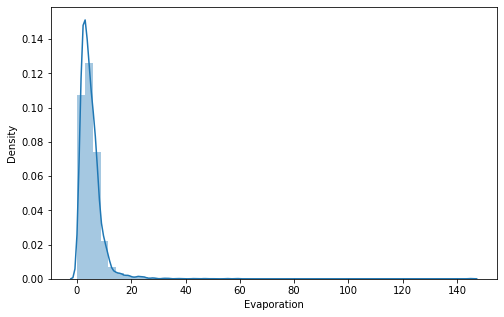

In [35]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Evaporation'])

In this rainfall and Evaporation column has right skewed

In [36]:
df.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
day                int64
month              int64
dtype: object

# Remove skewness and outliers

In [37]:
# Check skewness:
df.skew().sort_values(ascending=False)

Rainfall         13.171886
Evaporation       9.620049
RainToday         1.242362
RainTomorrow      1.241588
WindSpeed9am      0.961402
WindGustSpeed     0.726039
WindSpeed3pm      0.495506
Temp3pm           0.401945
MaxTemp           0.374513
WindDir9am        0.172792
WindGustDir       0.119640
Humidity3pm       0.119302
month             0.039388
day               0.004260
Temp9am          -0.011359
Pressure3pm      -0.040156
Location         -0.050456
Pressure9am      -0.070560
MinTemp          -0.085610
Cloud9am         -0.109185
Cloud3pm         -0.115815
WindDir3pm       -0.119847
Humidity9am      -0.254196
Sunshine         -0.418999
dtype: float64

In [38]:
# Remove skewness using log transform and sqrt method:
import numpy as np
df['Evaporation']=np.sqrt(df['Evaporation'])

In [39]:
# Check skewness:
df.skew().sort_values(ascending=False)

Rainfall         13.171886
Evaporation       1.481380
RainToday         1.242362
RainTomorrow      1.241588
WindSpeed9am      0.961402
WindGustSpeed     0.726039
WindSpeed3pm      0.495506
Temp3pm           0.401945
MaxTemp           0.374513
WindDir9am        0.172792
WindGustDir       0.119640
Humidity3pm       0.119302
month             0.039388
day               0.004260
Temp9am          -0.011359
Pressure3pm      -0.040156
Location         -0.050456
Pressure9am      -0.070560
MinTemp          -0.085610
Cloud9am         -0.109185
Cloud3pm         -0.115815
WindDir3pm       -0.119847
Humidity9am      -0.254196
Sunshine         -0.418999
dtype: float64

<AxesSubplot:ylabel='Frequency'>

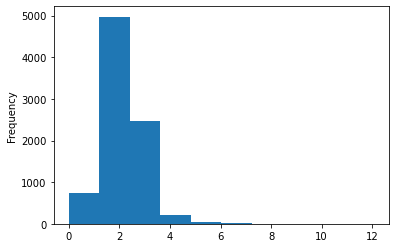

In [40]:
# Display Evaporation histogram after remove skewness:
df['Evaporation'].plot.hist()

Location            AxesSubplot(0.125,0.749828;0.133621x0.130172)
MinTemp          AxesSubplot(0.285345,0.749828;0.133621x0.130172)
MaxTemp           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Rainfall         AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Evaporation      AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Sunshine            AxesSubplot(0.125,0.593621;0.133621x0.130172)
WindGustDir      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
WindGustSpeed     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
WindDir9am       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
WindDir3pm       AxesSubplot(0.766379,0.593621;0.133621x0.130172)
WindSpeed9am        AxesSubplot(0.125,0.437414;0.133621x0.130172)
WindSpeed3pm     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Humidity9am       AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Humidity3pm      AxesSubplot(0.606034,0.437414;0.133621x0.130172)
Pressure9am      AxesSubplot(0.766379,0.437414;0.133621x0.130172)
Pressure3p

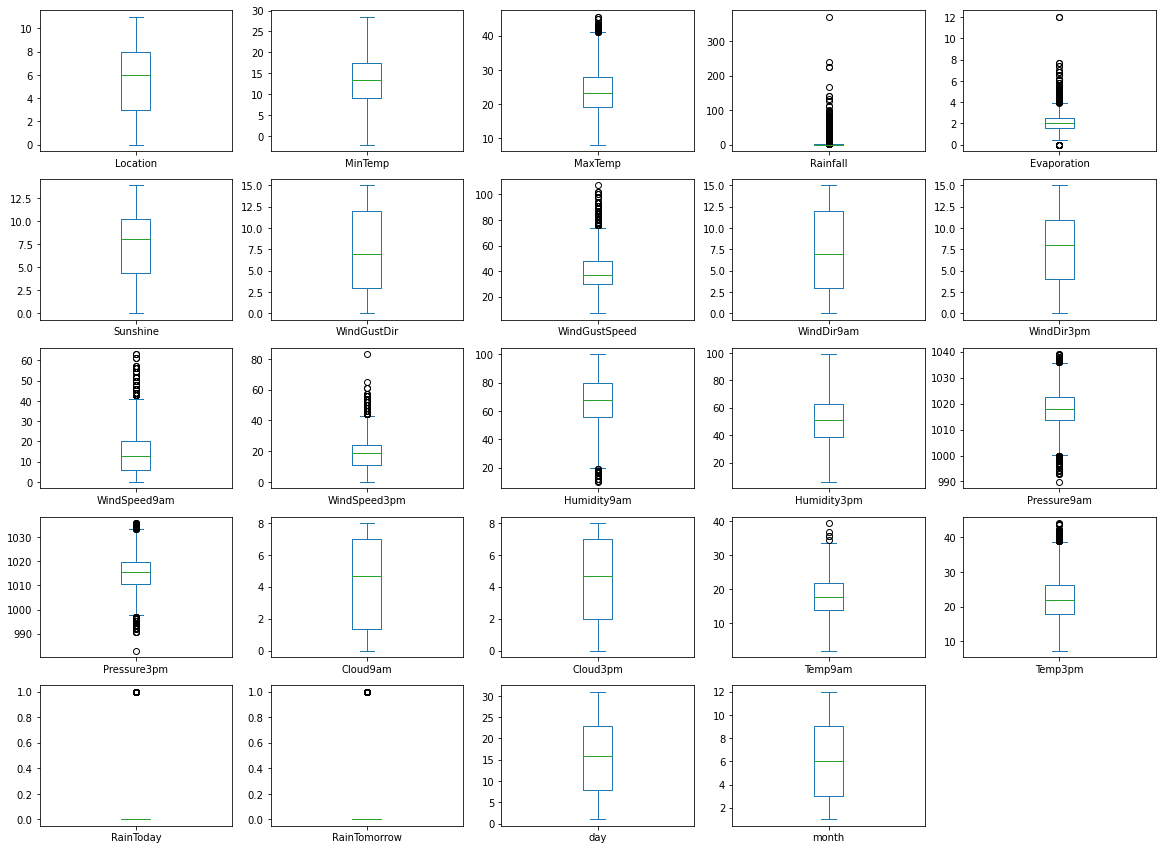

In [41]:
# Checking outliers with boxplot:
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(20,15))

Observation :- here some columns has outliers like: MaxTemp, Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm etc.  

In [42]:
# Get the numbers of rows and columns:
df.shape

(8425, 24)

In [43]:
# Lets quantify:
from scipy.stats import zscore
(np.abs(zscore(df))<3).all()

Location          True
MinTemp           True
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm       True
Pressure9am      False
Pressure3pm      False
Cloud9am          True
Cloud3pm          True
Temp9am          False
Temp3pm          False
RainToday         True
RainTomorrow      True
day               True
month             True
dtype: bool

In [45]:
# Detecting outliers:
from scipy.stats import zscore
z = np.abs(zscore(df))
print(np.where(z>3))

(array([  12,   12,   24,   44,   44,   52,   52,   60,   60,   61,   61,
         62,   62,   67,   68,   68,   89,  123,  267,  296,  350,  381,
        381,  381,  396,  405,  406,  407,  407,  412,  415,  422,  431,
        462,  563,  568,  683,  683,  699,  713,  748,  760,  770,  796,
        797,  797,  802,  928,  935,  949,  979,  980,  980,  980, 1008,
       1009, 1011, 1138, 1148, 1149, 1151, 1189, 1202, 1203, 1237, 1241,
       1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481, 1513, 1535,
       1587, 1624, 1644, 1654, 1660, 1661, 1665, 1671, 1673, 1680, 1740,
       1774, 1819, 1873, 1898, 1903, 1903, 1945, 2016, 2028, 2043, 2063,
       2074, 2108, 2116, 2162, 2186, 2201, 2219, 2219, 2219, 2230, 2231,
       2265, 2429, 2488, 2505, 2527, 2527, 2541, 2579, 2593, 2676, 2677,
       2735, 2835, 2849, 2855, 2859, 2860, 2863, 2869, 2877, 2883, 2890,
       2891, 2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2933, 2939,
       2946, 2947, 2953, 2959, 2961, 2967, 2975, 2

In [46]:
# Assign the value to new_df which are less the threshold value and removing outliers:
df_new = df[(z<3).all(axis=1)]
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
0,1.0,13.4,22.9,0.6,3.966527,0.500000,13.0,44.000000,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.666667,16.9,21.8,0,0,1,12
1,1.0,7.4,25.1,0.0,2.190890,10.066667,14.0,44.000000,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.666667,1.333333,17.2,24.3,0,0,2,12
2,1.0,12.9,25.7,0.0,2.394438,11.666667,15.0,46.000000,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,3.000000,2.000000,21.0,23.2,0,0,3,12
3,1.0,9.2,28.0,0.0,2.265686,10.866667,4.0,24.000000,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.333333,0.666667,18.1,26.5,0,0,4,12
4,1.0,17.5,32.3,1.0,1.770122,8.833333,13.0,41.000000,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.4,0.0,1.693123,9.500000,0.0,31.000000,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.333333,0.333333,10.1,22.4,0,0,21,6
8421,9.0,3.6,25.3,0.0,1.751190,9.900000,6.0,22.000000,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,2.333333,0.666667,10.9,24.5,0,0,22,6
8422,9.0,5.4,26.9,0.0,1.861899,12.033333,3.0,37.000000,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,3.666667,4.000000,12.5,26.1,0,0,23,6
8423,9.0,7.8,27.0,0.0,1.897367,9.466667,9.0,28.000000,10.0,3.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6


In [47]:
# Get the numbers of rows and columns:
df_new.shape

(8008, 24)

In [48]:
# Check dataloss:
data_loss = ((8425 - 8008)/8425)*100
data_loss

4.949554896142433

In [49]:
# Assign new dataframe values to old ones:
df = df_new
df.shape

(8008, 24)

### Correlation

In [50]:
# Check correlation of columns:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
Location,1.000000,0.118211,0.067382,0.020563,0.143066,-0.029570,-0.035670,0.234533,-0.041647,-0.029731,0.236066,0.230915,0.003250,0.058355,-0.019475,-0.012693,0.056904,0.063493,0.119586,0.064937,0.004095,0.012274,-0.003302,-0.088034
MinTemp,0.118211,1.000000,0.720195,0.090315,0.544536,0.084535,-0.148787,0.248287,-0.039307,-0.152978,0.146384,0.192217,-0.128502,0.087276,-0.494629,-0.489652,0.159511,0.081949,0.890810,0.692320,0.064615,0.090103,0.005995,-0.246583
MaxTemp,0.067382,0.720195,1.000000,-0.139136,0.641865,0.522727,-0.236267,0.157753,-0.215205,-0.189238,0.013373,0.097356,-0.383346,-0.412165,-0.377112,-0.458048,-0.248598,-0.273313,0.864203,0.977729,-0.218792,-0.149833,0.012788,-0.165908
Rainfall,0.020563,0.090315,-0.139136,1.000000,-0.106911,-0.258222,0.079754,0.085680,0.116339,0.073270,0.050251,0.035135,0.299040,0.294472,-0.115490,-0.060780,0.260273,0.212878,-0.033060,-0.145675,0.690094,0.264420,-0.014253,-0.003915
Evaporation,0.143066,0.544536,0.641865,-0.106911,1.000000,0.416123,-0.089915,0.320296,-0.043547,-0.065682,0.226843,0.246947,-0.475476,-0.330331,-0.348310,-0.364959,-0.156620,-0.192827,0.636330,0.625849,-0.190167,-0.109478,0.000803,-0.046119
Sunshine,-0.029570,0.084535,0.522727,-0.258222,0.416123,1.000000,-0.096899,0.067395,-0.079560,-0.073187,0.000656,0.110909,-0.547500,-0.686343,-0.023826,-0.089218,-0.630047,-0.654864,0.329303,0.547550,-0.323939,-0.402032,-0.002366,0.035840
WindGustDir,-0.035670,-0.148787,-0.236267,0.079754,-0.089915,-0.096899,1.000000,0.064576,0.407641,0.506707,0.047822,0.115866,0.031671,0.050613,-0.108809,-0.019814,0.086162,0.076898,-0.179005,-0.243542,0.119889,0.044969,0.015890,0.037939
WindGustSpeed,0.234533,0.248287,0.157753,0.085680,0.320296,0.067395,0.064576,1.000000,-0.022743,0.060991,0.641493,0.716282,-0.305704,-0.121429,-0.409644,-0.365985,0.022675,0.081444,0.222000,0.124420,0.070728,0.167167,-0.010746,0.043804
WindDir9am,-0.041647,-0.039307,-0.215205,0.116339,-0.043547,-0.079560,0.407641,-0.022743,1.000000,0.244121,0.083438,0.062014,0.006811,0.117192,-0.025295,0.061481,0.086081,0.076902,-0.095708,-0.221130,0.147842,0.028565,-0.011068,0.018235
WindDir3pm,-0.029731,-0.152978,-0.189238,0.073270,-0.065682,-0.073187,0.506707,0.060991,0.244121,1.000000,0.039253,0.078707,-0.008472,-0.008287,-0.115736,-0.024767,0.051624,0.050423,-0.170305,-0.201429,0.098372,0.003292,-0.000013,0.028717


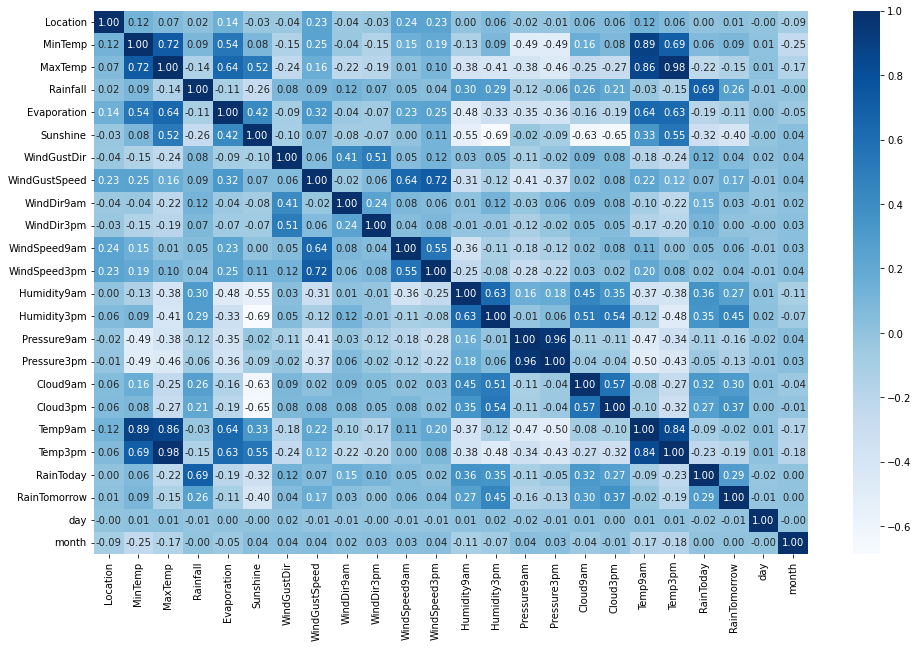

In [51]:
# Check correlation matrix with heatmap:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, fmt = '.2f', cmap = 'Blues')
#sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

##### Observation :- In this correlation matrix Min and Max Temp, Temp3pm and 9pm, Humidity3pm and 9pm, Pressure3pm and 9pm are highly correlate with each other.

# MultiCollinearity with Variance Inflation Factor (VIF)

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
X = df.drop(columns=['RainTomorrow','Rainfall'],axis=1)
Y = df[['RainTomorrow','Rainfall']]

In [52]:
def calc_vif():
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    print(vif)

In [53]:
calc_vif()

         Features     VIF Factor
0        Location       4.971134
1         MinTemp      61.669035
2         MaxTemp     501.792237
3     Evaporation      22.522630
4        Sunshine      16.955264
5     WindGustDir       5.306798
6   WindGustSpeed      25.102019
7      WindDir9am       4.731004
8      WindDir3pm       5.969074
9    WindSpeed9am       6.398221
10   WindSpeed3pm      11.229736
11    Humidity9am      71.780832
12    Humidity3pm      52.453802
13    Pressure9am  542719.515590
14    Pressure3pm  542127.829575
15       Cloud9am       7.166861
16       Cloud3pm       7.891598
17        Temp9am     190.485295
18        Temp3pm     602.671610
19      RainToday       1.735598
20            day       4.207651
21          month       5.268077


In [54]:
df.drop(columns=['MaxTemp','Pressure3pm','Temp9am','Cloud3pm','Humidity3pm'], axis=1, inplace=True)

In [55]:
df.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Cloud9am,Temp3pm,RainToday,RainTomorrow,day,month
0,1.0,13.4,0.6,3.966527,0.500000,13.0,44.0,13.0,14.0,20.0,24.0,71.0,1007.7,8.000000,21.8,0,0,1,12
1,1.0,7.4,0.0,2.190890,10.066667,14.0,44.0,6.0,15.0,4.0,22.0,44.0,1010.6,0.666667,24.3,0,0,2,12
2,1.0,12.9,0.0,2.394438,11.666667,15.0,46.0,13.0,15.0,19.0,26.0,38.0,1007.6,3.000000,23.2,0,0,3,12
3,1.0,9.2,0.0,2.265686,10.866667,4.0,24.0,9.0,0.0,11.0,9.0,45.0,1017.6,1.333333,26.5,0,0,4,12
4,1.0,17.5,1.0,1.770122,8.833333,13.0,41.0,1.0,7.0,7.0,20.0,82.0,1010.8,7.000000,29.7,0,0,5,12


# Prediction of Rainfall :-

# Data Preprocessing

In [75]:
x = df.drop(columns=['Rainfall'],axis=1)
y = df['Rainfall']

In [76]:
x.head()

,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Cloud9am,Temp3pm,RainToday,RainTomorrow,day,month
0,1.0,13.4,3.966527,0.500000,13.0,44.0,13.0,14.0,20.0,24.0,71.0,1007.7,8.000000,21.8,0,0,1,12
1,1.0,7.4,2.190890,10.066667,14.0,44.0,6.0,15.0,4.0,22.0,44.0,1010.6,0.666667,24.3,0,0,2,12
2,1.0,12.9,2.394438,11.666667,15.0,46.0,13.0,15.0,19.0,26.0,38.0,1007.6,3.000000,23.2,0,0,3,12
3,1.0,9.2,2.265686,10.866667,4.0,24.0,9.0,0.0,11.0,9.0,45.0,1017.6,1.333333,26.5,0,0,4,12
4,1.0,17.5,1.770122,8.833333,13.0,41.0,1.0,7.0,7.0,20.0,82.0,1010.8,7.000000,29.7,0,0,5,12


In [77]:
y.head()

0    0.6
1    0.0
2    0.0
3    0.0
4    1.0
Name: Rainfall, dtype: float64

In [78]:
print(x.shape, y.shape)

(8008, 18) (8008,)


# Scaling the data

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.5086577 ,  0.06355605,  2.82129958, ..., -0.54367567,
        -1.67289118,  1.63585522],
       [-1.5086577 , -1.0451749 ,  0.19094724, ..., -0.54367567,
        -1.55917445,  1.63585522],
       [-1.5086577 , -0.0288382 ,  0.49247427, ..., -0.54367567,
        -1.44545773,  1.63585522],
       ...,
       [ 1.0291038 , -1.41475189, -0.29640688, ..., -0.54367567,
         0.82887678, -0.12488787],
       [ 1.0291038 , -0.97125951, -0.2438662 , ..., -0.54367567,
         0.94259351, -0.12488787],
       [ 1.0291038 ,  0.34073879,  0.88337826, ..., -0.54367567,
         1.05631023, -0.12488787]])

# Training process begins

#### Finding best random_state

In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [82]:
model = [lr,rf,abr,gbr,dtr]
max_r2_score = 0
for r_state in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = r_state)
    for i in model:
        i.fit(x_train,y_train)
        pred_test = i.predict(x_test)
        r2_sc = r2_score(y_test,pred_test)
        print("R2 score correspond to random state ",r_state,"is",r2_sc)
        if r2_sc > max_r2_score:
            max_r2_score = r2_sc
            final_state = r_state
            final_model = i

R2 score correspond to random state  0 is 0.47233891958925645
R2 score correspond to random state  0 is 0.6651253185228032
R2 score correspond to random state  0 is 0.4193575996213267
R2 score correspond to random state  0 is 0.5323931883923189
R2 score correspond to random state  0 is 0.4747867449853339
R2 score correspond to random state  1 is 0.5161046573111105
R2 score correspond to random state  1 is 0.6833335538542673
R2 score correspond to random state  1 is 0.41193458223248924
R2 score correspond to random state  1 is 0.5662065747175937
R2 score correspond to random state  1 is 0.4097683345570051
R2 score correspond to random state  2 is 0.48443005336842393
R2 score correspond to random state  2 is 0.7069928889609349
R2 score correspond to random state  2 is 0.4003254928708748
R2 score correspond to random state  2 is 0.5743164595082457
R2 score correspond to random state  2 is 0.44792948700691637
R2 score correspond to random state  3 is 0.5197887661439272
R2 score correspond 

R2 score correspond to random state  26 is 0.5238118834912218
R2 score correspond to random state  26 is 0.4279206050092259
R2 score correspond to random state  27 is 0.47911199882948285
R2 score correspond to random state  27 is 0.6408663790549924
R2 score correspond to random state  27 is 0.37441192997403294
R2 score correspond to random state  27 is 0.5480654032227287
R2 score correspond to random state  27 is 0.2801747714435151
R2 score correspond to random state  28 is 0.4750153648425931
R2 score correspond to random state  28 is 0.6862994521351449
R2 score correspond to random state  28 is 0.35314190492247854
R2 score correspond to random state  28 is 0.5464427881859808
R2 score correspond to random state  28 is 0.31665192578407275
R2 score correspond to random state  29 is 0.46591695117516896
R2 score correspond to random state  29 is 0.642010829118492
R2 score correspond to random state  29 is 0.3361573565872279
R2 score correspond to random state  29 is 0.5262704674750771
R2 s

R2 score correspond to random state  53 is 0.6387574142667098
R2 score correspond to random state  53 is 0.33603873763566705
R2 score correspond to random state  53 is 0.5506548397985849
R2 score correspond to random state  53 is 0.22773698108747797
R2 score correspond to random state  54 is 0.4855813026210727
R2 score correspond to random state  54 is 0.68586140190923
R2 score correspond to random state  54 is 0.36944415513585827
R2 score correspond to random state  54 is 0.5671655265796316
R2 score correspond to random state  54 is 0.462581833645334
R2 score correspond to random state  55 is 0.5055421648686114
R2 score correspond to random state  55 is 0.6865634293879219
R2 score correspond to random state  55 is 0.4266252725801335
R2 score correspond to random state  55 is 0.5628790265273704
R2 score correspond to random state  55 is 0.3940119152462297
R2 score correspond to random state  56 is 0.46441924562046455
R2 score correspond to random state  56 is 0.682301931723444
R2 score

R2 score correspond to random state  79 is 0.5444683358161027
R2 score correspond to random state  79 is 0.36113763344538186
R2 score correspond to random state  80 is 0.5032705613360595
R2 score correspond to random state  80 is 0.6656611709803225
R2 score correspond to random state  80 is 0.3679462366879561
R2 score correspond to random state  80 is 0.5585245552728612
R2 score correspond to random state  80 is 0.24112823238070935
R2 score correspond to random state  81 is 0.4940029068681381
R2 score correspond to random state  81 is 0.6600308612528096
R2 score correspond to random state  81 is 0.3362657557698222
R2 score correspond to random state  81 is 0.5853134068685102
R2 score correspond to random state  81 is 0.1758296268198023
R2 score correspond to random state  82 is 0.46945716469960785
R2 score correspond to random state  82 is 0.6466266662712241
R2 score correspond to random state  82 is 0.4281517105806646
R2 score correspond to random state  82 is 0.5338111265857327
R2 sc

In [83]:
print("max R2 score correspond to random state ", final_state, "is", max_r2_score, "and model is", final_model)

max R2 score correspond to random state  25 is 0.7233214916484372 and model is RandomForestRegressor()


# Creating train-test split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = 25)

### Apply best model

In [85]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("r2 score :- ",r2_score(y_test,pred))

r2 score :-  0.7179766791959625


### Check MAE, MSE and RMSE

In [86]:
#display MAE, MSE and RMSE 
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('error:')

print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squared error',mean_squared_error(y_test,pred))

print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error 0.9271792617963037
mean squared error 6.4081520564675305
Root mean squared error 2.531432807022049


# Cross Validation of the model

In [87]:
from sklearn.model_selection import cross_val_score
lss = r2_score(y_test,pred)
for i in range(2,10):
    lsscore = cross_val_score(rf,x,y,cv=i)
    lsc = lsscore.mean()
    print("At cv:-",i)
    print("cross validation score is :-",lsc*100)
    print("r2 score is :-",lss*100)
    print("\n")

At cv:- 2
cross validation score is :- 51.605821857709074
r2 score is :- 71.79766791959625


At cv:- 3
cross validation score is :- 53.07108431220183
r2 score is :- 71.79766791959625


At cv:- 4
cross validation score is :- 51.57307052082072
r2 score is :- 71.79766791959625


At cv:- 5
cross validation score is :- 59.89955996160511
r2 score is :- 71.79766791959625


At cv:- 6
cross validation score is :- 58.537274056066494
r2 score is :- 71.79766791959625


At cv:- 7
cross validation score is :- 60.52660385234573
r2 score is :- 71.79766791959625


At cv:- 8
cross validation score is :- 63.9586467559752
r2 score is :- 71.79766791959625


At cv:- 9
cross validation score is :- 63.92635309279636
r2 score is :- 71.79766791959625




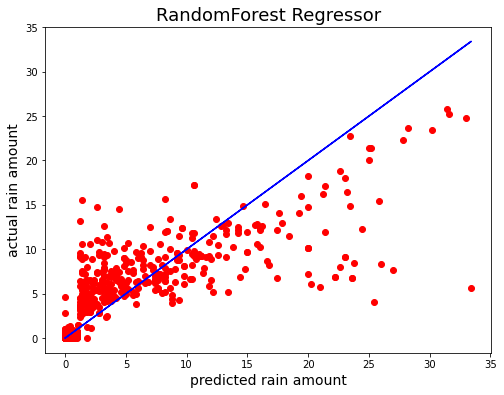

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred, color = 'r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("predicted rain amount",fontsize=14)
plt.ylabel("actual rain amount",fontsize=14)
plt.title("RandomForest Regressor",fontsize=18)
plt.show()

# Hypertuning of the model:

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [91]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [92]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, scoring='neg_mean_squared_error', n_iter = 10, cv = 9, verbose=2, random_state=85, n_jobs = 1)

In [93]:
rf_random.fit(x_train,y_train)

Fitting 9 folds for each of 10 candidates, totalling 90 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total 

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  16.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  16.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  16.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  16.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.4s
[CV] END max_depth=20, max_featu

RandomizedSearchCV(cv=9, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=85, scoring='neg_mean_squared_error',
                   verbose=2)

In [94]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [95]:
rf = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print("R2 score:",rfs*100)

rfscore = cross_val_score(rf,x,y,cv=9)
rfc = rfscore.mean()
print("Cross Val Score is",rfc*100)

R2 score: 72.18748171158458
Cross Val Score is 64.7682284605244


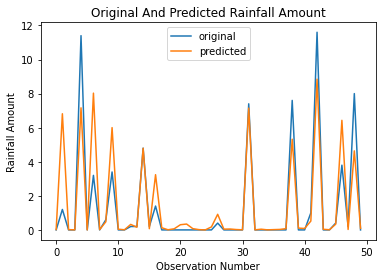

In [96]:
number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.plot(x_ax, y_test[:number_of_observations], label="original")

plt.plot(x_ax, pred_decision[:number_of_observations], label="predicted")

plt.title("Original And Predicted Rainfall Amount")

plt.xlabel('Observation Number')

plt.ylabel('Rainfall Amount')

plt.legend()

plt.show()

# Conclusion:

In [97]:
import numpy as np
a = np.array(y_test)
#predicted = np.array(ls.predict(x_test))
df_comp = pd.DataFrame({'original':a,'predicted':pred_decision},index=range(len(a)))
df_comp

,original,predicted
0,0.0,0.022695
1,1.2,6.816901
2,0.0,0.017134
3,0.0,0.003007
4,11.4,7.163967
...,...,...
1597,0.0,0.011710
1598,5.6,5.071282
1599,0.0,0.049781
1600,7.4,6.544724


# Prediction of Forecast Whether or not (it will rain tomorrow ):-

# Data Preprocessing

In [52]:
x = df.drop(columns=['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [53]:
x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,day,month
0,1.0,13.4,22.9,0.6,3.966527,0.500000,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.666667,16.9,21.8,0,1,12
1,1.0,7.4,25.1,0.0,2.190890,10.066667,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.666667,1.333333,17.2,24.3,0,2,12
2,1.0,12.9,25.7,0.0,2.394438,11.666667,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,3.000000,2.000000,21.0,23.2,0,3,12
3,1.0,9.2,28.0,0.0,2.265686,10.866667,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.333333,0.666667,18.1,26.5,0,4,12
4,1.0,17.5,32.3,1.0,1.770122,8.833333,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,5,12


In [54]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [55]:
print(x.shape, y.shape)

(8008, 23) (8008,)


# Scaling the data

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.5086577 ,  0.06355605, -0.1441178 , ..., -0.54232614,
        -1.67289118,  1.63585522],
       [-1.5086577 , -1.0451749 ,  0.22165471, ..., -0.54232614,
        -1.55917445,  1.63585522],
       [-1.5086577 , -0.0288382 ,  0.32141084, ..., -0.54232614,
        -1.44545773,  1.63585522],
       ...,
       [ 1.0291038 , -1.41475189,  0.52092312, ..., -0.54232614,
         0.82887678, -0.12488787],
       [ 1.0291038 , -0.97125951,  0.53754914, ..., -0.54232614,
         0.94259351, -0.12488787],
       [ 1.0291038 ,  0.34073879,  0.78693949, ..., -0.54232614,
         1.05631023, -0.12488787]])

# Since the outcome has only two variables we will use binary classification model.

In [58]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.svm import SVC
svc = SVC()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training process begins

#### Finding best random_state

In [60]:
model = [lr,rfc,dtc,svc,gnb]
maxAcc_score = 0
for r_state in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = r_state)
    for i in model:
        i.fit(x_train,y_train)
        pred_test = i.predict(x_test)
        acc_sc = accuracy_score(y_test,pred_test)
        print("Accuracy score correspond to random state ",r_state,"is",acc_sc)
        if acc_sc > maxAcc_score:
            maxAcc_score = acc_sc
            final_state = r_state
            final_model = i

Accuracy score correspond to random state  0 is 0.8302122347066168
Accuracy score correspond to random state  0 is 0.885143570536829
Accuracy score correspond to random state  0 is 0.8414481897627965
Accuracy score correspond to random state  0 is 0.7815230961298377
Accuracy score correspond to random state  0 is 0.7615480649188514
Accuracy score correspond to random state  1 is 0.8314606741573034
Accuracy score correspond to random state  1 is 0.8957553058676654
Accuracy score correspond to random state  1 is 0.8508114856429463
Accuracy score correspond to random state  1 is 0.7715355805243446
Accuracy score correspond to random state  1 is 0.7696629213483146
Accuracy score correspond to random state  2 is 0.8302122347066168
Accuracy score correspond to random state  2 is 0.8932584269662921
Accuracy score correspond to random state  2 is 0.865792759051186
Accuracy score correspond to random state  2 is 0.7671660424469413
Accuracy score correspond to random state  2 is 0.78089887640449

Accuracy score correspond to random state  24 is 0.7715355805243446
Accuracy score correspond to random state  24 is 0.7846441947565543
Accuracy score correspond to random state  25 is 0.8239700374531835
Accuracy score correspond to random state  25 is 0.883270911360799
Accuracy score correspond to random state  25 is 0.8439450686641697
Accuracy score correspond to random state  25 is 0.7696629213483146
Accuracy score correspond to random state  25 is 0.7752808988764045
Accuracy score correspond to random state  26 is 0.8314606741573034
Accuracy score correspond to random state  26 is 0.8957553058676654
Accuracy score correspond to random state  26 is 0.8420724094881398
Accuracy score correspond to random state  26 is 0.7765293383270911
Accuracy score correspond to random state  26 is 0.7908863920099876
Accuracy score correspond to random state  27 is 0.8283395755305868
Accuracy score correspond to random state  27 is 0.8826466916354557
Accuracy score correspond to random state  27 is 

Accuracy score correspond to random state  49 is 0.9013732833957553
Accuracy score correspond to random state  49 is 0.8607990012484394
Accuracy score correspond to random state  49 is 0.764669163545568
Accuracy score correspond to random state  49 is 0.7890137328339576
Accuracy score correspond to random state  50 is 0.83645443196005
Accuracy score correspond to random state  50 is 0.9032459425717853
Accuracy score correspond to random state  50 is 0.8352059925093633
Accuracy score correspond to random state  50 is 0.787765293383271
Accuracy score correspond to random state  50 is 0.7696629213483146
Accuracy score correspond to random state  51 is 0.8314606741573034
Accuracy score correspond to random state  51 is 0.885143570536829
Accuracy score correspond to random state  51 is 0.8420724094881398
Accuracy score correspond to random state  51 is 0.764669163545568
Accuracy score correspond to random state  51 is 0.7921348314606742
Accuracy score correspond to random state  52 is 0.823

Accuracy score correspond to random state  73 is 0.7690387016229713
Accuracy score correspond to random state  73 is 0.7771535580524345
Accuracy score correspond to random state  74 is 0.8352059925093633
Accuracy score correspond to random state  74 is 0.900749063670412
Accuracy score correspond to random state  74 is 0.8451935081148564
Accuracy score correspond to random state  74 is 0.7871410736579276
Accuracy score correspond to random state  74 is 0.7815230961298377
Accuracy score correspond to random state  75 is 0.8308364544319601
Accuracy score correspond to random state  75 is 0.8895131086142322
Accuracy score correspond to random state  75 is 0.8564294631710362
Accuracy score correspond to random state  75 is 0.7771535580524345
Accuracy score correspond to random state  75 is 0.7915106117353309
Accuracy score correspond to random state  76 is 0.83458177278402
Accuracy score correspond to random state  76 is 0.8895131086142322
Accuracy score correspond to random state  76 is 0.

Accuracy score correspond to random state  98 is 0.8920099875156055
Accuracy score correspond to random state  98 is 0.8620474406991261
Accuracy score correspond to random state  98 is 0.7559300873907615
Accuracy score correspond to random state  98 is 0.7621722846441947
Accuracy score correspond to random state  99 is 0.8270911360799001
Accuracy score correspond to random state  99 is 0.8926342072409488
Accuracy score correspond to random state  99 is 0.83458177278402
Accuracy score correspond to random state  99 is 0.7727840199750312
Accuracy score correspond to random state  99 is 0.7715355805243446


In [62]:
print("max Accuracy score correspond to random state ",final_state,"is",maxAcc_score,"and model is",final_model)

max Accuracy score correspond to random state  18 is 0.9107365792759051 and model is RandomForestClassifier()


# Creating train-test split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = 18)

In [64]:
x_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,day,month
3120,10.0,5.7,19.5,0.0,1.914854,11.133333,14.0,43.000000,14.0,11.0,33.0,11.0,50.0,33.0,1023.300000,1021.000000,1.666667,3.666667,13.2,18.5,0,13,8
3883,10.0,10.0,24.0,0.0,3.464102,9.900000,14.0,31.000000,7.0,9.0,13.0,17.0,52.0,55.0,1021.700000,1018.300000,4.666667,3.000000,19.3,22.5,0,16,5
7576,8.0,13.7,24.8,0.0,2.645751,8.600000,7.0,56.000000,3.0,7.0,17.0,22.0,50.0,60.0,1012.400000,1010.600000,5.000000,7.000000,20.7,23.0,0,2,10
4880,5.0,5.8,15.6,0.0,1.549193,6.200000,15.0,30.000000,13.0,11.0,15.0,15.0,56.0,44.0,1026.400000,1024.100000,7.000000,7.000000,11.1,14.7,0,30,9
4925,5.0,13.1,19.8,15.6,1.673320,1.500000,12.0,37.000000,14.0,12.0,13.0,15.0,78.0,69.0,1014.100000,1013.500000,6.666667,6.666667,15.7,19.8,1,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,6.0,15.5,27.0,0.0,2.000000,8.833333,3.0,23.333333,3.0,9.0,0.0,9.0,74.0,71.0,1018.733333,1015.266667,0.000000,6.000000,22.5,25.5,0,19,3
3019,10.0,13.9,26.4,0.0,2.422120,11.100000,14.0,43.000000,14.0,13.0,28.0,17.0,50.0,32.0,1016.200000,1014.200000,0.333333,0.666667,20.3,25.5,0,4,5
1192,3.0,21.3,24.7,0.0,1.732051,3.300000,11.0,44.000000,11.0,10.0,28.0,20.0,74.0,71.0,1018.800000,1017.900000,7.000000,7.000000,22.7,23.3,0,20,12
4632,5.0,13.6,23.8,0.0,2.569047,11.200000,8.0,33.000000,9.0,8.0,13.0,20.0,62.0,48.0,1014.800000,1012.400000,6.000000,1.000000,16.7,22.3,0,25,1


In [65]:
x_test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,day,month
244,1.0,7.5,14.1,0.8,1.527525,3.466667,6.0,30.000000,12.0,6.0,2.0,17.0,94.0,65.0,1027.9,1024.800000,1.0,6.0,10.5,13.3,0,2,8
3002,10.0,13.3,23.0,0.0,3.162278,2.900000,9.0,63.000000,14.0,15.0,11.0,13.0,87.0,97.0,1021.3,1020.100000,7.0,8.0,18.8,17.4,0,17,4
6516,2.0,22.6,31.2,20.0,2.645751,5.300000,2.0,26.000000,3.0,4.0,6.0,6.0,83.0,77.0,1009.4,1006.300000,7.0,7.0,26.1,27.8,1,21,2
3954,10.0,10.0,19.0,0.0,2.569047,8.733333,14.0,56.000000,14.0,7.0,33.0,35.0,43.0,32.0,1017.3,1014.300000,5.0,1.0,14.2,18.9,0,26,7
3012,10.0,10.0,23.2,0.0,1.414214,1.200000,2.0,28.000000,7.0,2.0,13.0,11.0,86.0,65.0,1027.9,1024.000000,6.0,5.0,16.3,22.3,0,27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,11.0,17.4,22.9,0.2,2.129163,1.900000,4.0,24.000000,5.0,4.0,13.0,19.0,85.0,68.0,1014.5,1013.600000,8.0,8.0,19.0,22.4,0,25,12
4933,5.0,13.7,33.3,0.2,2.280351,12.100000,11.0,54.000000,5.0,3.0,19.0,33.0,68.0,21.0,1020.5,1017.100000,1.0,2.0,20.5,32.4,0,22,11
1770,6.0,20.8,25.7,1.2,2.129163,0.766667,3.0,20.333333,3.0,9.0,0.0,0.0,91.0,96.0,1019.7,1016.933333,8.0,8.0,24.0,24.0,1,16,2
7390,8.0,17.7,22.8,0.0,2.828427,8.000000,12.0,46.000000,8.0,12.0,22.0,26.0,39.0,36.0,1018.7,1017.300000,7.0,1.0,18.9,22.0,0,30,3


In [66]:
y_train

3120    0
3883    0
7576    1
4880    0
4925    1
       ..
1801    0
3019    0
1192    0
4632    0
3543    0
Name: RainTomorrow, Length: 6406, dtype: int64

In [67]:
y_test

244     0
3002    1
6516    0
3954    0
3012    0
       ..
4313    0
4933    0
1770    1
7390    0
818     1
Name: RainTomorrow, Length: 1602, dtype: int64

In [68]:
print(x.shape, x_train.shape, x_test.shape)

(8008, 23) (6406, 23) (1602, 23)


In [69]:
print(y.shape, y_train.shape, y_test.shape)

(8008,) (6406,) (1602,)


In [70]:
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
print("accuracy score is:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is: 0.9038701622971286
[[1205   33]
 [ 121  243]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1238
           1       0.88      0.67      0.76       364

    accuracy                           0.90      1602
   macro avg       0.89      0.82      0.85      1602
weighted avg       0.90      0.90      0.90      1602



In [71]:
from sklearn.metrics import f1_score
print('F1 score is: ', f1_score(y_test, pred))

F1 score is:  0.7593749999999999


# Cross Validation of the model

In [72]:
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred)
for i in range(2,10):
    lsscore = cross_val_score(rfc,x,y,cv=i)
    lsc = lsscore.mean()
    print("At cv:-",i)
    print("cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv:- 2
cross validation score is :- 84.24075924075925
accuracy_score is :- 90.38701622971286


At cv:- 3
cross validation score is :- 84.7904010956705
accuracy_score is :- 90.38701622971286


At cv:- 4
cross validation score is :- 84.6028971028971
accuracy_score is :- 90.38701622971286


At cv:- 5
cross validation score is :- 85.95122742418322
accuracy_score is :- 90.38701622971286


At cv:- 6
cross validation score is :- 85.61392524711428
accuracy_score is :- 90.38701622971286


At cv:- 7
cross validation score is :- 86.98801198801199
accuracy_score is :- 90.38701622971286


At cv:- 8
cross validation score is :- 88.33666333666334
accuracy_score is :- 90.38701622971286


At cv:- 9
cross validation score is :- 89.47179355389565
accuracy_score is :- 90.38701622971286




In [73]:
lsscore_selected = cross_val_score(rfc,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8963416089842702 
The accuracy score is:  0.9038701622971286


# Hypertuning of the model:

In [74]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': ['auto','sqrt','log2'],
              'max_depth': [4,5,6,7,8],
              'criterion':['gini','entropy']}

In [80]:
GCV = GridSearchCV(RandomForestClassifier(), parameters, cv=9, scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [81]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8)

In [86]:
rf = RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

acc = accuracy_score(y_test,pred_decision)
print("Accuracy score:",acc*100)

cvscore = cross_val_score(rf,x,y,cv=9)
cv = cvscore.mean()
print("Cross Val Score is",cv*100)

Accuracy score: 86.45443196004993
Cross Val Score is 84.1029983611599


In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Criterion
criterion = ['gini','entropy']

In [77]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion' : criterion
             }

In [78]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = parameters, scoring='neg_mean_squared_error', n_iter = 10, cv = 9, verbose=2, random_state=95, n_jobs = 1)

In [80]:
rf_random.fit(x_train,y_train)

Fitting 9 folds for each of 10 candidates, totalling 90 fits
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.5s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.4s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.5s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.5s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.4s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.3s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_e

[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   8.6s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   8.5s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   8.4s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   8.5s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   7.1s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   7.3s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   7.2s
[CV] END criterio

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=95, scoring='neg_mean_squared_error',
                   verbose=2)

In [81]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'entropy'}

In [82]:
rf = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features='auto', max_depth=20, criterion='entropy')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

acc = accuracy_score(y_test,pred_decision)
print("Accuracy score:",acc*100)

cvscore = cross_val_score(rf,x,y,cv=9)
cv = cvscore.mean()
print("Cross Val Score is",cv*100)

Accuracy score: 87.64044943820225
Cross Val Score is 87.34950266048203


#### Here, the accuracy score is 87.64 and cv score is 87.34 that is pretty much good.

# ROC AUC Plot:

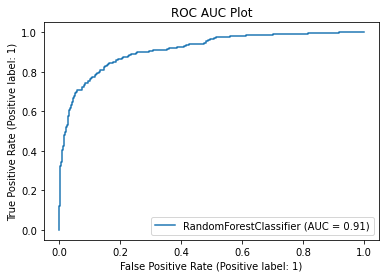

In [84]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_random.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

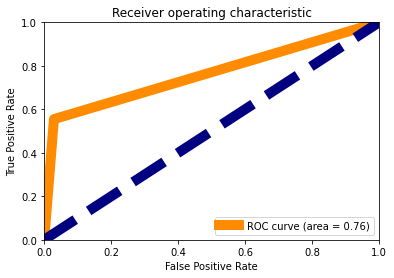

In [85]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test,pred_decision)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange', lw=10, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# Conclusion:

In [96]:
import numpy as np
a = np.array(y_test)
#predicted = np.array(ls.predict(x_test))
df_comp = pd.DataFrame({'original':a,'predicted':pred_decision},index=range(len(a)))
df_comp

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1597,0,0
1598,0,0
1599,0,0
1600,0,0


# Model Saving:

In [97]:
import pickle
filename = 'rain_weather_forecast.pkl'
pickle.dump(rf,open(filename,'wb'))